# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Homework 5 submission</b></u>

### Roster Name: David Danialy
### Preferred Name (if different): Chosen Name
### Student ID: 011187150
### Email address: david.danialy@sjsu.edu

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from statistics import mean
from sklearn.ensemble import RandomForestClassifier

In [3]:
np.random.seed(42)

#### Code the solution

In [4]:
df = pd.read_csv('Decision Tree Data.csv')
X = df.drop('class', axis=1)
X_numeric = pd.get_dummies(X, columns = X.columns, prefix = X.columns)
X_train, X_test, Y_train, Y_test = train_test_split(X_numeric, df['class'], test_size=0.2, random_state=0)

7434    e
7725    e
783     e
1928    e
7466    p
Name: class, dtype: object

In [6]:
model = DecisionTreeClassifier(random_state=0)
res = cross_val_score(model, X_train, Y_train, cv=5, n_jobs=-1)
print("Accuracies of each model: " + str(res))
print("Mean accuracy: " + str(mean(res)))

Mean accuracy: 0.916


In [7]:
# model.fit(X_train, Y_train)
model = RandomForestClassifier()

model.fit(X_train, Y_train)
print('Accuracy of decision tree on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of decision tree on test set: {:.2f}'.format(model.score(X_test, Y_test)))

NameError: name 'RandomForestClassifier' is not defined

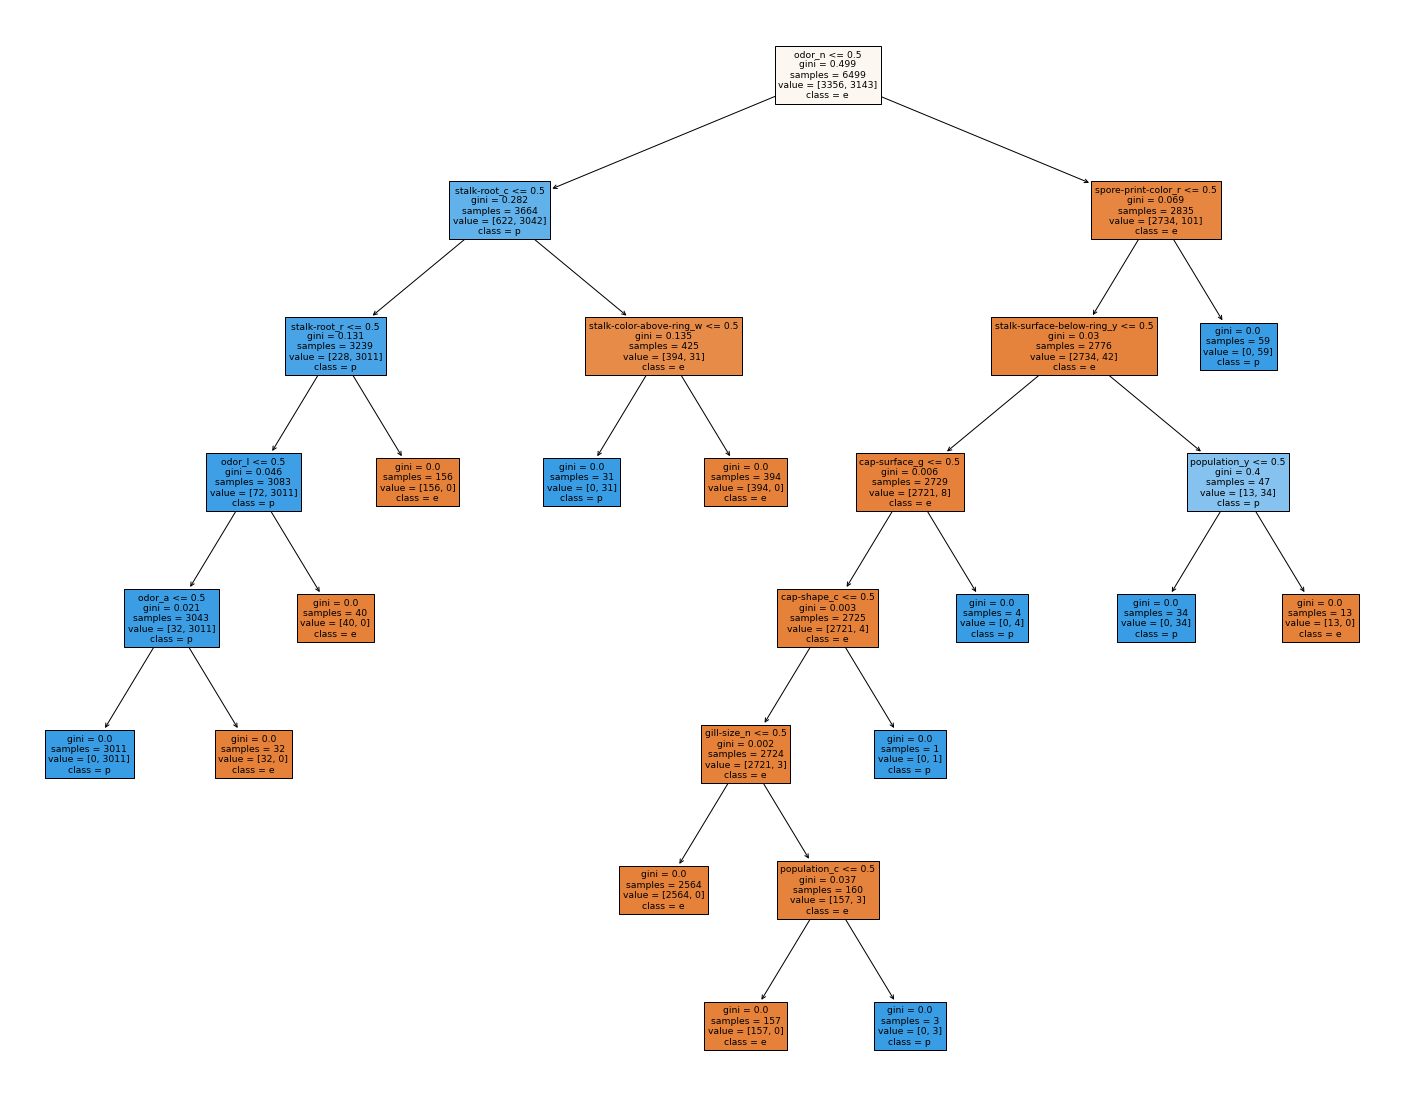

In [6]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=X_train.columns, class_names=['e', 'p'], filled=True)

Confusion matrix, without normalization
[[852   0]
 [  0 773]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


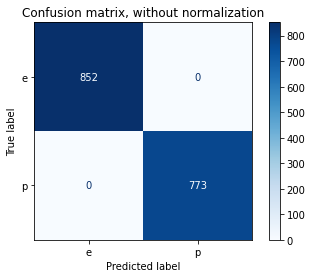

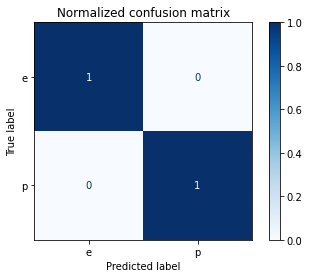

In [7]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=['e', 'p'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()